In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [ ]:
np.random.seed(1)

## Generate training and test data

$y = ax^2 + bx + c + \epsilon, \quad \epsilon \sim N(0, \sigma^2)$

$ x \sim Uniform[0, 1]$

In [ ]:
def generate_data(N, a, b, c, std):
    x = np.random.rand(N)
    y = a*x**2 + b*x + c + std*np.random.randn(N)
    return x, y

In [ ]:
N_train = 20
N_test = 1000
a = 1.
b = -0.8
c = 1.
std = 0.02

x_train, y_train = generate_data(N_train, a, b, c, std)
x_test, y_test = generate_data(N_test, a, b, c, std)

x_clean = np.linspace(0,1,100)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(20,)
(20,)


Text(0, 0.5, 'y')

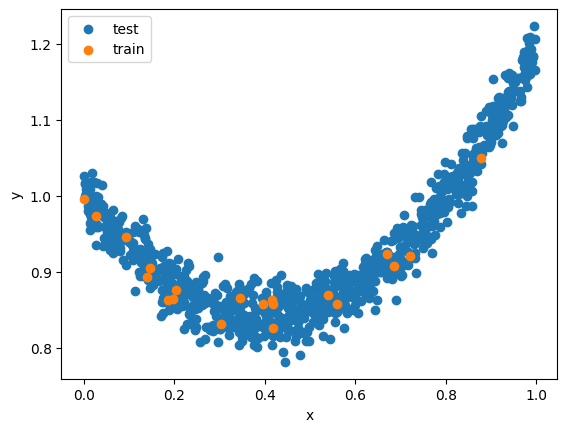

In [ ]:
plt.scatter(x_test, y_test, label='test')
plt.scatter(x_train, y_train, label='train')
#plt.plot(x_clean, y_clean)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

## Define optimization problem

### Model

$y = f(\text{x};w) = w_p x^p + w_{p-1} x^{p-1} + \ldots + w_1 x + w_0 = \text{x}^\top w,$

where $\text{x} = [x^p, x^{p-1}, \ldots, 1]^\top, w = [w^p, w^{p-1}, \ldots, w_0]^\top \in \mathbb{R}^{p+1}$

### Objective function

$\begin{align}
L(w) & = \frac{1}{2}\sum_{i=1}^N \|f(\text{x}_i; w) - y_i\|^2 = \frac{1}{2}\sum_{i=1}^N \|\text{x}_i^\top w - y_i\|^2 \\
& = \frac{1}{2} \| X^\top w - y \|^2 = \frac{1}{2} (X^\top w - y)^\top (X^\top w - y) \\
& = \frac{1}{2} (w^\top XX^\top w - 2 w^\top X y + y^\top y),
\end{align}$

where $X = [\text{x}_1, \text{x}_2, \ldots, \text{x}_N] \in \mathbb{R}^{D \times N} \quad (D = p+1), \quad y = [y_1, \ldots, y_N]^\top \in \mathbb{R}^N$

In [ ]:
def getX(x, p):
    X = np.ones((p+1, len(x)))
    for i in range(p+1):
        X[i] = x**(p-i)
    return X

In [ ]:
p = 6
X_train = getX(x_train, p)
print(X_train.shape)
print(X_train[:,:4])

(7, 20)
[[5.25961348e-03 1.39691215e-01 2.23863083e-24 7.63676871e-04]
 [1.26123164e-02 1.93928176e-01 1.95727599e-20 2.52594970e-03]
 [3.02437672e-02 2.69223354e-01 1.71128228e-16 8.35487119e-03]
 [7.25231927e-02 3.73752880e-01 1.49620548e-12 2.76347041e-02]
 [1.73907352e-01 5.18867376e-01 1.30815988e-08 9.14049845e-02]
 [4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]]


## Analytic solution

$\frac{\partial L}{\partial w} = XX^\top w - Xy = 0$

$w^* = (XX^\top)^{-1}Xy$

In [ ]:
XXT = np.dot(X_train, X_train.T)
Xy = np.dot(X_train, y_train)

In [ ]:
XXT.shape, Xy.shape

((7, 7), (7,))

In [ ]:
XXT_inv = np.linalg.inv(XXT)
np.allclose(np.dot(XXT_inv, XXT), np.eye(XXT.shape[0]))

False

In [ ]:
np.dot(XXT_inv, XXT)

array([[ 9.99999997e-01, -3.40336252e-09, -3.67629865e-09,
        -5.69242410e-09, -8.18717642e-09, -1.19427588e-08,
        -3.41060513e-09],
       [ 3.14068339e-09,  1.00000000e+00,  6.88756675e-10,
         3.61437505e-09,  5.98232613e-09,  1.31004794e-08,
        -1.64382072e-08],
       [-5.22449581e-10,  8.23063613e-10,  1.00000000e+00,
         1.02653248e-09, -3.84301730e-09, -6.40055976e-09,
         2.26755219e-08],
       [ 4.75604205e-10,  3.77471014e-10, -3.32515352e-10,
         1.00000000e+00,  2.13681302e-09,  4.98868994e-09,
        -7.16045179e-09],
       [-1.81144334e-10, -1.99392063e-10, -8.54910736e-11,
        -2.59018096e-10,  9.99999999e-01, -1.07896875e-09,
         1.15483090e-09],
       [ 6.91593614e-14, -7.43479781e-12, -1.98888562e-11,
        -6.40048900e-12,  7.85545575e-12,  1.00000000e+00,
        -1.55182533e-10],
       [ 1.38673139e-13,  2.09440283e-13,  4.03656013e-13,
         1.08505472e-13,  2.14810170e-13, -1.35291841e-13,
         1.0000000

In [ ]:
start = time.time()
for i in range(100000):
    w1 = np.linalg.solve(XXT, Xy)
print(time.time() - start)
start = time.time()
for i in range(100000):
    XXT_inv = np.linalg.inv(XXT)
    w2 = np.dot(XXT_inv, Xy)
print(time.time() - start)
print(np.allclose(w1, w2))
print(w1.shape, w2.shape)

1.3609306812286377
2.3200573921203613
True
(7,) (7,)


## Plot the solution

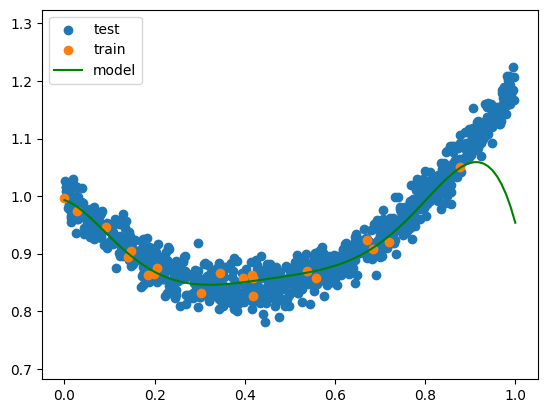

In [ ]:
X_predict = getX(x_clean, p)
y_predict = np.dot(X_predict.T, w1)

plt.scatter(x_test, y_test, label='test')
plt.scatter(x_train, y_train, label='train')

plt.plot(x_clean, y_predict, c='g', label='model')
plt.ylim([y_test.min()-0.1, y_test.max()+0.1])
plt.legend()

## Solve for different degrees of polynomials and overfitting problem

In [ ]:
def curve_fitting(x, y, p):
    X = getX(x, p)
    XXT = np.dot(X, X.T)
    Xy = np.dot(X, y)
    w = np.linalg.solve(XXT, Xy)
    train_error = np.mean((np.dot(X.T, w) - y)**2)
    return w, train_error

def predict(x_predict, w):
    p = len(w)-1
    X_predict = getX(x_predict, p)
    return  np.dot(X_predict.T, w)

def get_test_error(x_test, y_test, w):
    y_predict = predict(x_test, w)
    return np.mean((y_predict - y_test)**2)

def plot_result(x_train, y_train, w):
    plt.scatter(x_train, y_train, label='train')
    x_clean = np.linspace(0,1,100)
    y_predict = predict(x_clean, w)
    plt.plot(x_clean, y_predict, label='model', c='g')
    plt.ylim([y_test.min()-0.1, y_test.max()+0.1])
    plt.legend()
    plt.title('degree = {:d}, N = {:d}'.format(len(w)-1, len(x_train)))

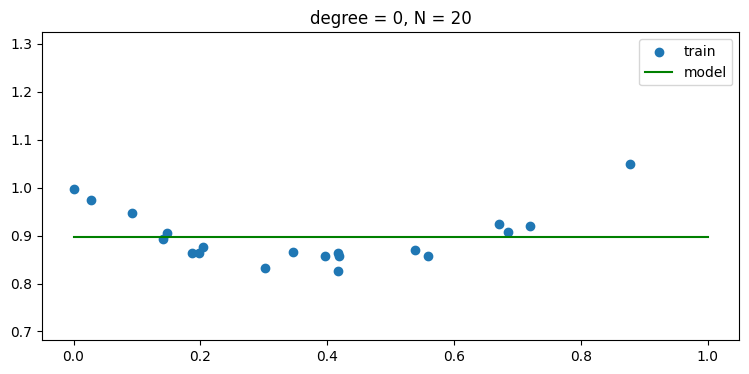

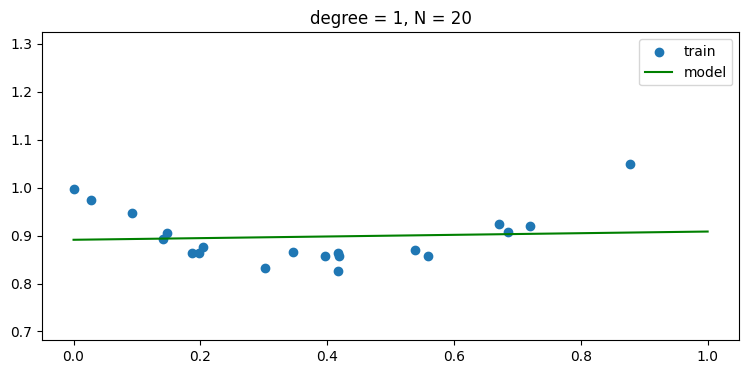

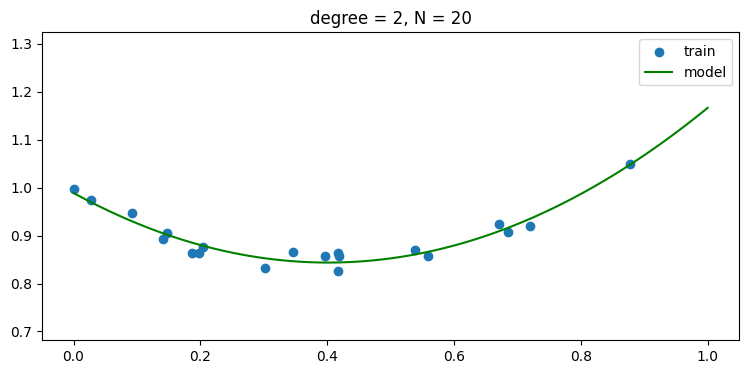

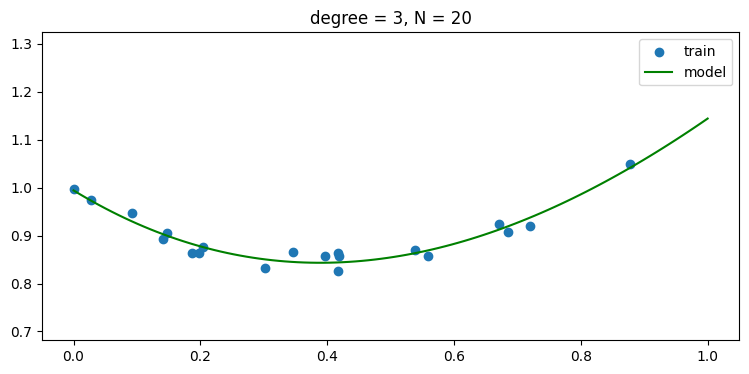

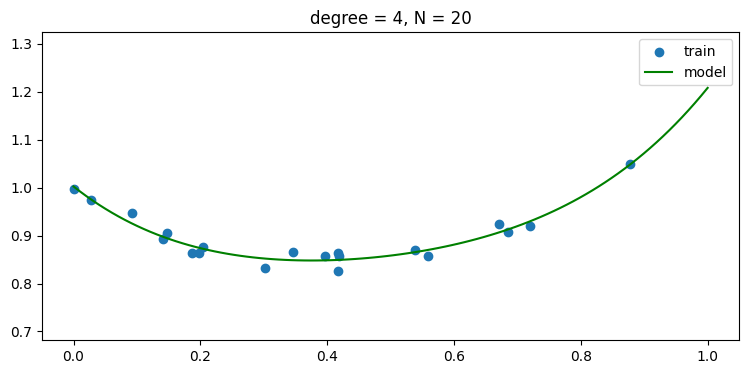

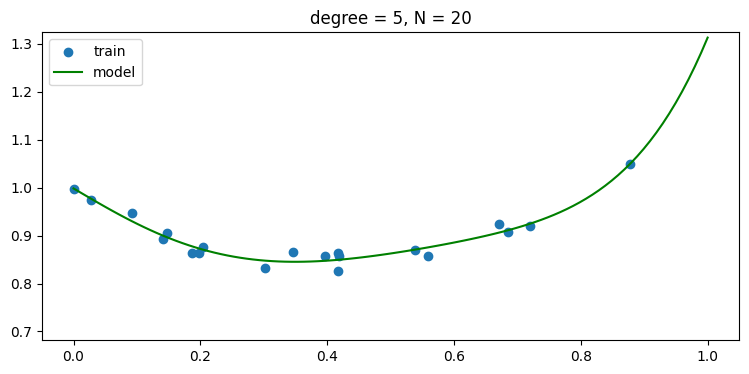

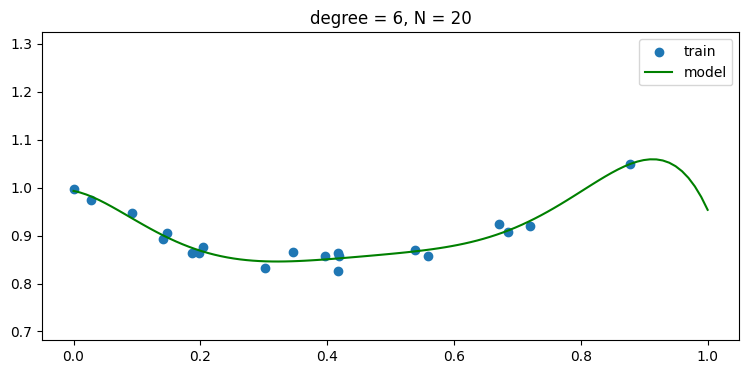

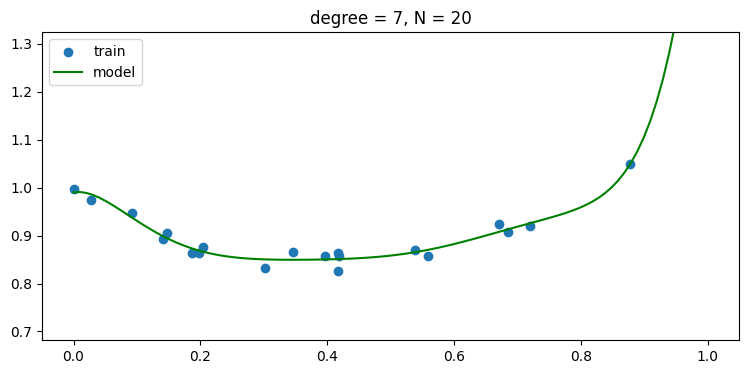

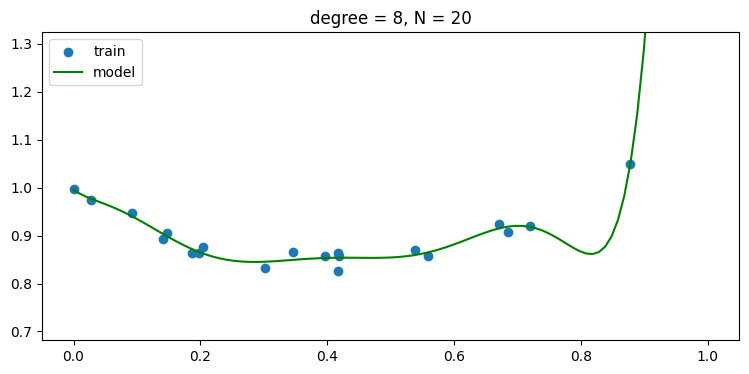

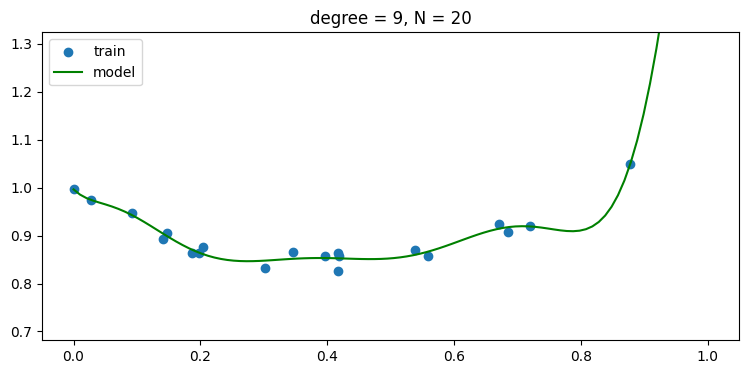

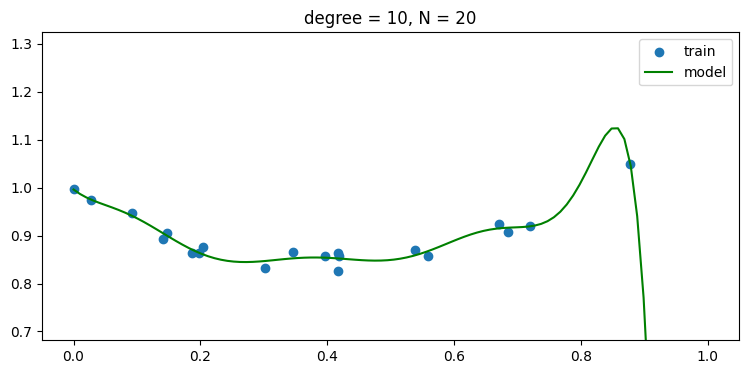

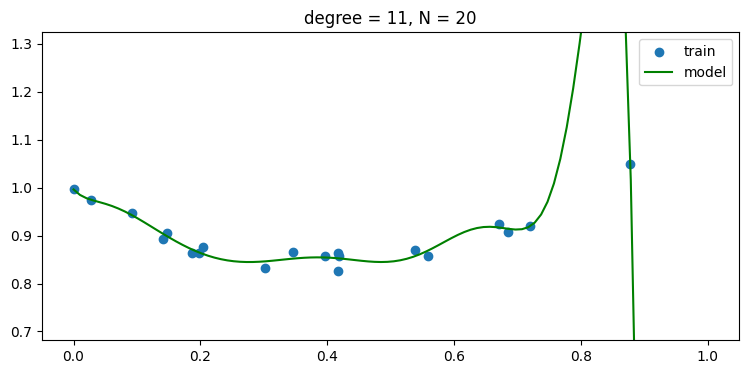

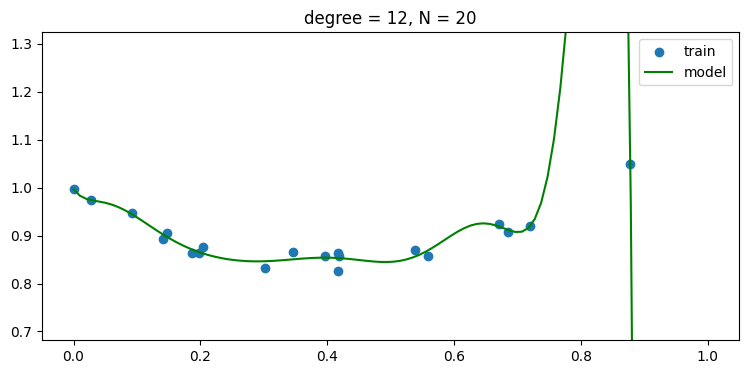

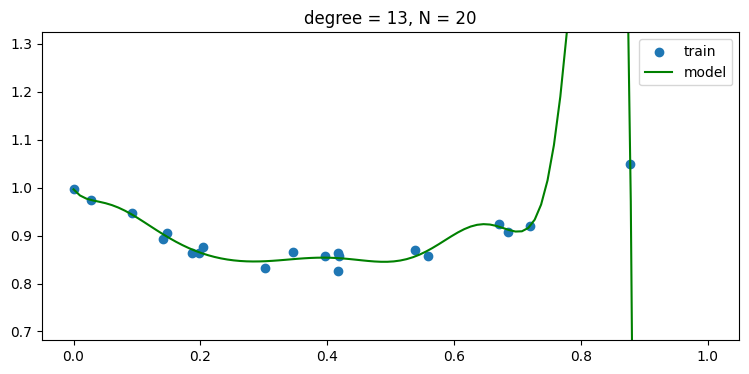

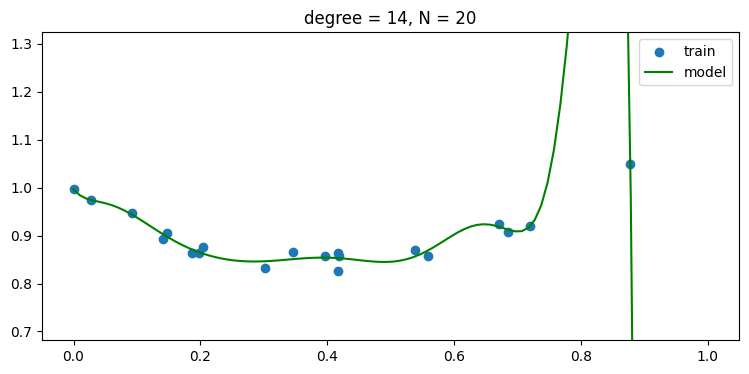

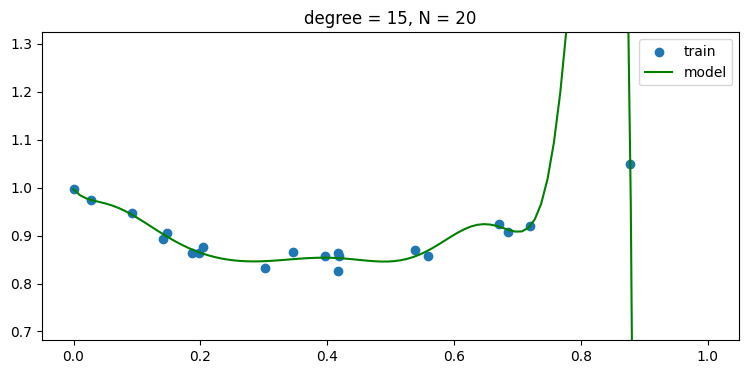

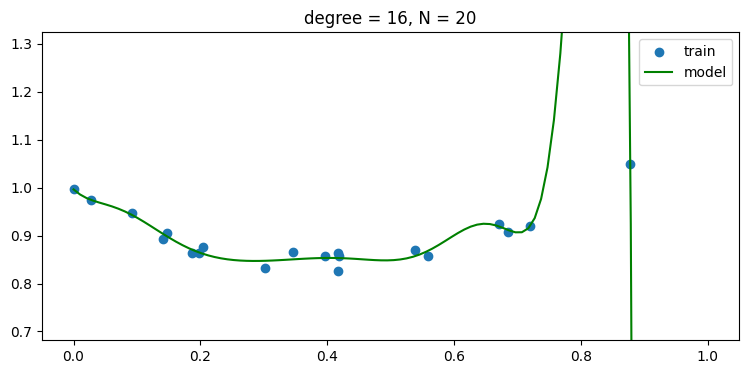

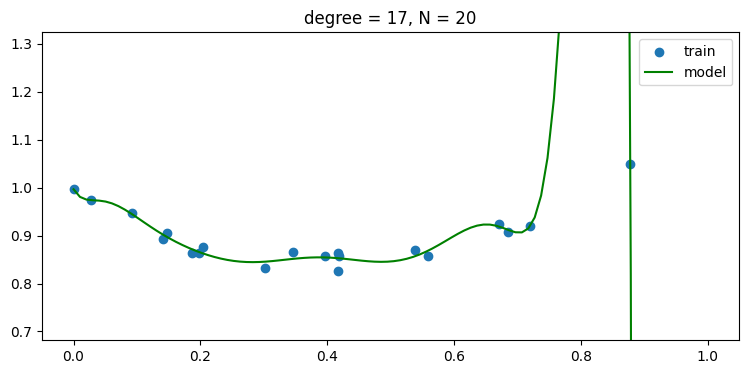

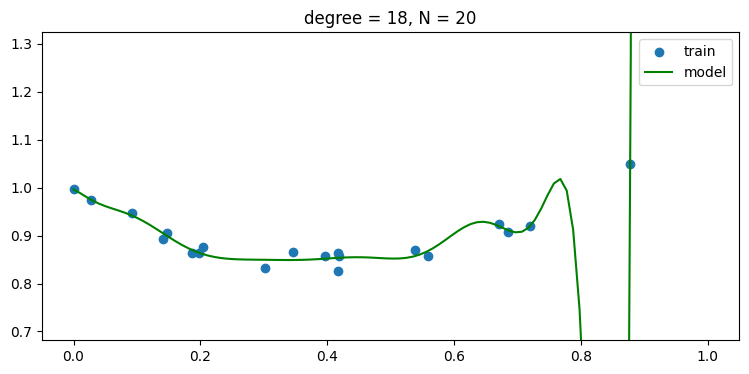

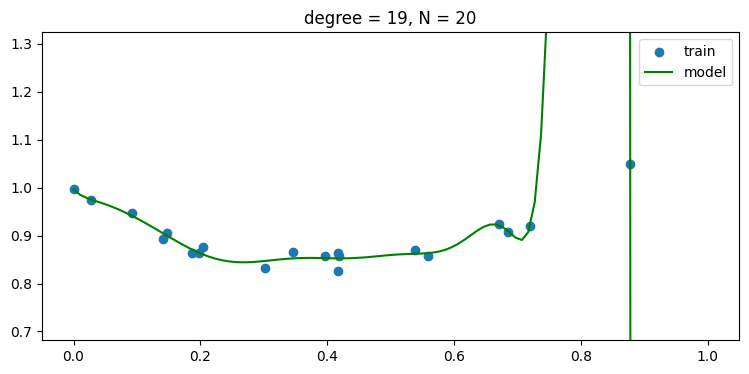

In [ ]:
train_error_list = []
test_error_list = []
w_list = []
for p in range(N_train):
    w, train_error = curve_fitting(x_train, y_train, p)
    test_error = get_test_error(x_test, y_test, w)
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    w_list.append(w)
    plt.figure(figsize=(9, 4))
    plot_result(x_train, y_train, w)

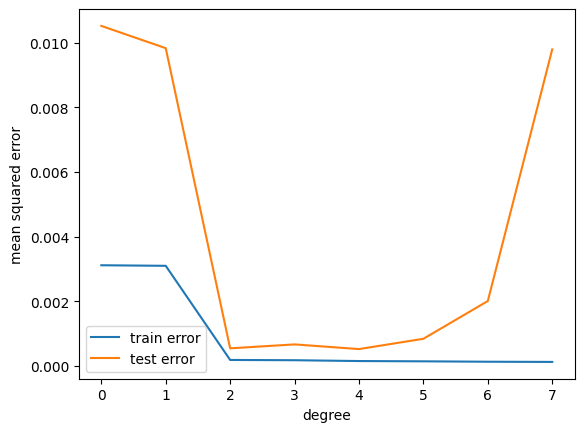

In [ ]:
p_list = np.arange(N_train)
N_disp = 8
plt.plot(p_list[:N_disp], train_error_list[:N_disp], label='train error')
plt.plot(p_list[:N_disp], test_error_list[:N_disp], label='test error')
plt.xlabel('degree')
plt.ylabel('mean squared error')
plt.legend()

## Varying the number of data

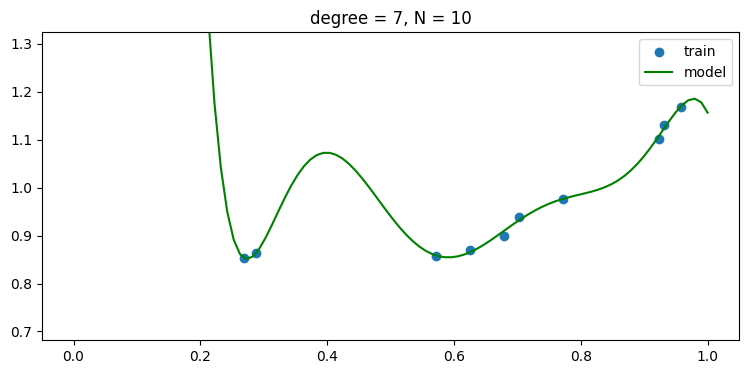

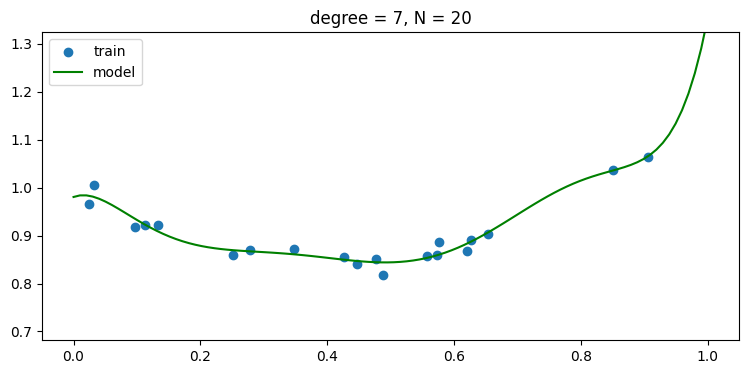

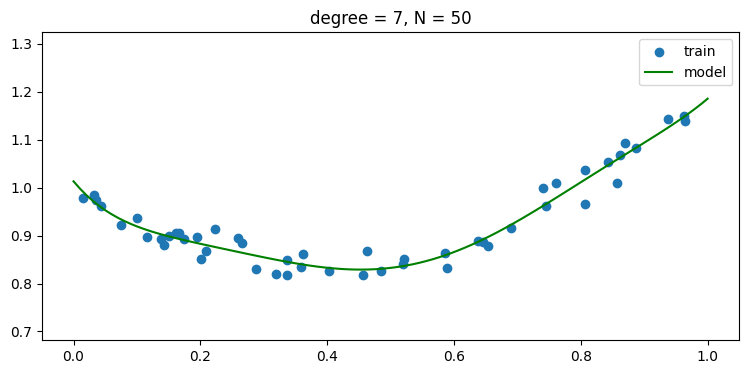

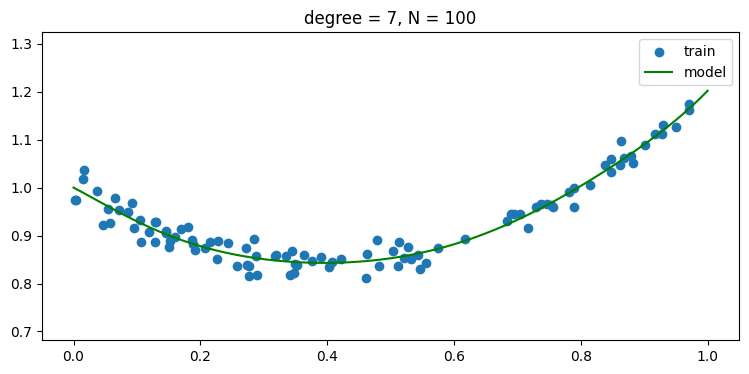

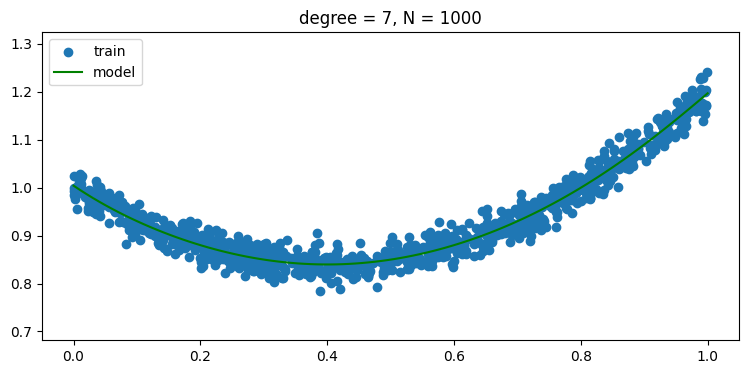

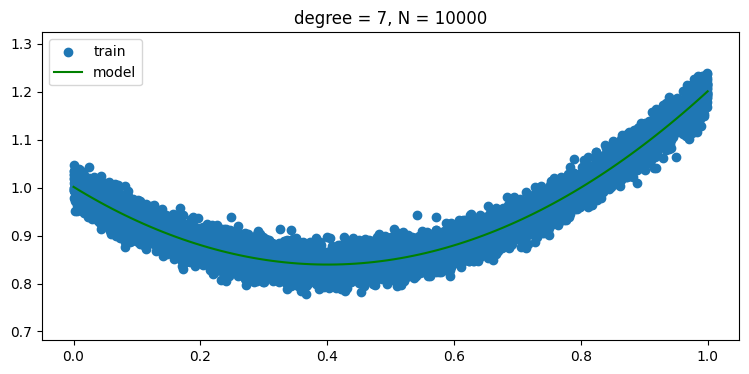

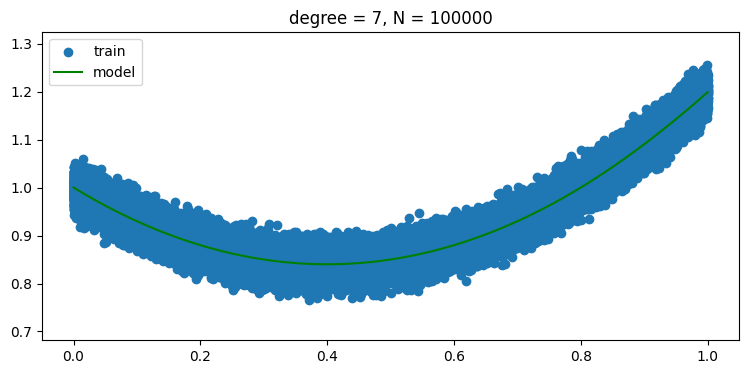

In [ ]:
N_list = [10, 20, 50, 100, 1000, 10000, 100000]
train_error_list = []
test_error_list = []
w_list = []
p = 7
for N_train in N_list:
    x_train, y_train = generate_data(N_train, a, b, c, std)
    w, train_error = curve_fitting(x_train, y_train, p)
    test_error = get_test_error(x_test, y_test, w)
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    w_list.append(w)
    plt.figure(figsize=(9, 4))
    plot_result(x_train, y_train, w)

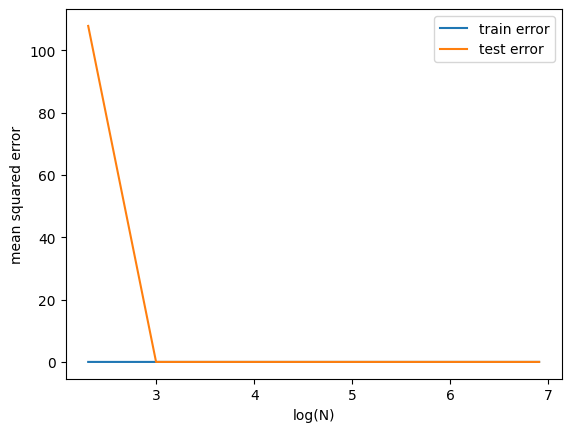

In [ ]:
N_disp = 5
plt.plot(np.log(N_list[:N_disp]), train_error_list[:N_disp], label='train error')
plt.plot(np.log(N_list[:N_disp]), test_error_list[:N_disp], label='test error')
plt.xlabel('log(N)')
plt.ylabel('mean squared error')
plt.legend()

## Apply numerical methods

### Loss

$L(w) = \frac{1}{2} \| X^\top w - y \|^2 = \frac{1}{2} (w^\top XX^\top w - 2 w^\top X y + y^\top y)$

In [ ]:
N_train = 20
x_train, y_train = generate_data(N_train, a, b, c, std)

In [ ]:
p = 1
w_opt, train_error_opt = curve_fitting(x_train, y_train, p)

In [ ]:
def loss(x, y, w):
    p = len(w)-1
    X = getX(x, p)
    return 0.5*np.sum((np.dot(X.T, w) - y)**2)

def gradient(x, y, w):
    p = len(w)-1
    X = getX(x, p)
    return np.dot(X, np.dot(X.T, w)) - np.dot(X, y)

def hessian(x, y, w):
    p = len(w)-1
    X = getX(x, p)
    return np.dot(X, X.T)

In [ ]:
def plot_optimization_trajectory(w_list, w1s, w0s, w_opt):
    w_list_np = np.array(w_list)
    xx, yy = np.meshgrid(w1s, w0s)
    #print(xx.shape, yy.shape)
    zz = np.empty((len(w0s), len(w1s)))
    for i, w1 in enumerate(w1s):
        for j, w0 in enumerate(w0s):
            zz[j,i] = loss(x_train, y_train, np.array([w1, w0]))
    clev = np.arange(0,zz.max(),.01)
    h = plt.contourf(w1s, w0s, zz, clev)
    cbar = plt.colorbar()
    cbar.set_label('loss')
    plt.plot(w_list_np[:,0], w_list_np[:,1], c='orange', marker='o')
    plt.scatter(w_opt[0], w_opt[1], c='r', s=200, marker='*', zorder=10)
    plt.axis('scaled')
    plt.xlabel('w1')
    plt.ylabel('w0')
    plt.xlim([w1s.min(), w1s.max()])
    plt.ylim([w0s.min(), w0s.max()])
    plt.show()

### Gradient descent

$w^{(t+1)} = w^{(t)} - \eta_t \frac{\partial L}{\partial w}|_{w=w^{(t)}}$

$\frac{\partial L}{\partial w} = XX^\top w - Xy \in \mathbb{R}^D \quad (D=p+1)$

#### setting 1

In [ ]:
p = 1
eta = 0.01
T = 100
w_init = np.zeros(p+1)
w_list = [w_init]
loss_list = [loss(x_train, y_train, w_init)]
for i in range(T):
    w_prev = w_list[-1]
    w_cur = w_prev - eta * gradient(x_train, y_train, w_prev)
    w_list.append(w_cur)
    loss_list.append(loss(x_train, y_train, w_cur))

Text(0, 0.5, 'loss')

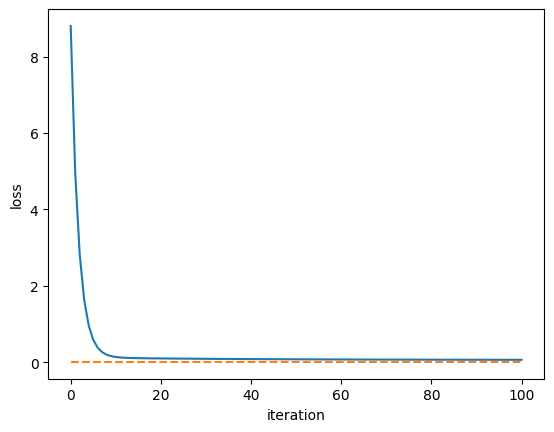

In [ ]:
plt.plot(loss_list)
plt.plot([i for i in range(len(loss_list))], [train_error_opt]*len(loss_list), '--')
plt.xlabel('iteration')
plt.ylabel('loss')

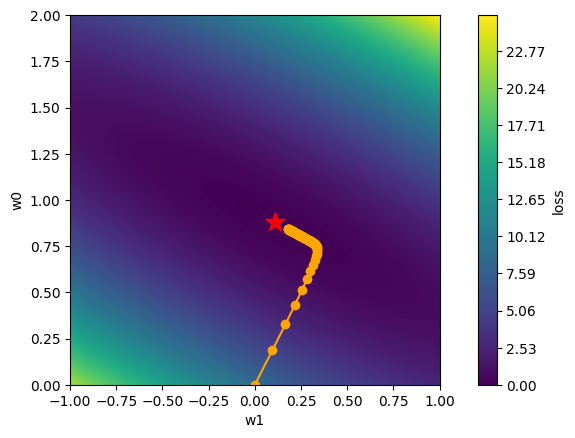

In [ ]:
w1s = np.linspace(-1,1,101)
w0s = np.linspace(0,2,51)
plot_optimization_trajectory(w_list, w1s, w0s, w_opt)

#### setting 2

In [ ]:
p = 1
eta = 0.1
T = 10
w_init = np.array([0.5, 0.75])
w_list = [w_init]
loss_list = [loss(x_train, y_train, w_init)]
for i in range(T):
    w_prev = w_list[-1]
    w_cur = w_prev - eta * gradient(x_train, y_train, w_prev)
    w_list.append(w_cur)
    loss_list.append(loss(x_train, y_train, w_cur))

Text(0, 0.5, 'loss')

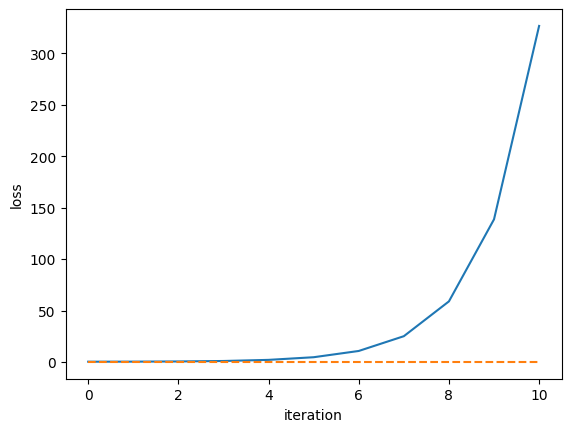

In [ ]:
plt.plot(loss_list)
plt.plot([i for i in range(len(loss_list))], [train_error_opt]*len(loss_list), '--')
plt.xlabel('iteration')
plt.ylabel('loss')

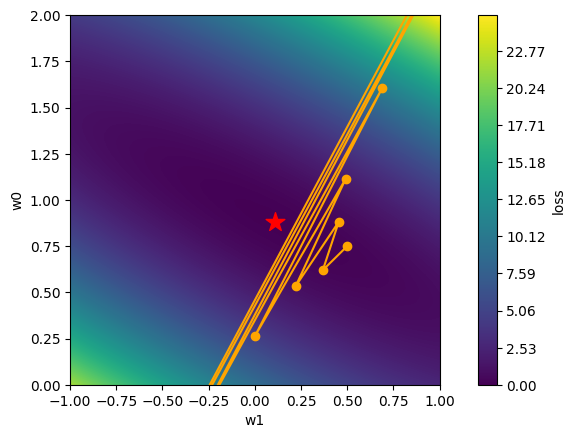

In [ ]:
w1s = np.linspace(-1,1,101)
w0s = np.linspace(0,2,51)
plot_optimization_trajectory(w_list, w1s, w0s, w_opt)

#### setting 3

In [ ]:
p = 1
T = 15
w_init = np.array([-0.2, 0.8])
w_list = [w_init]
loss_list = [loss(x_train, y_train, w_init)]
for i in range(T):
    w_prev = w_list[-1]
    g = gradient(x_train, y_train, w_prev)
    H = hessian(x_train, y_train, w_prev)
    eta = np.sum(g*g) / np.dot(np.dot(g.T, H), g)
    w_cur = w_prev - eta * g
    w_list.append(w_cur)
    loss_list.append(loss(x_train, y_train, w_cur))

Text(0, 0.5, 'loss')

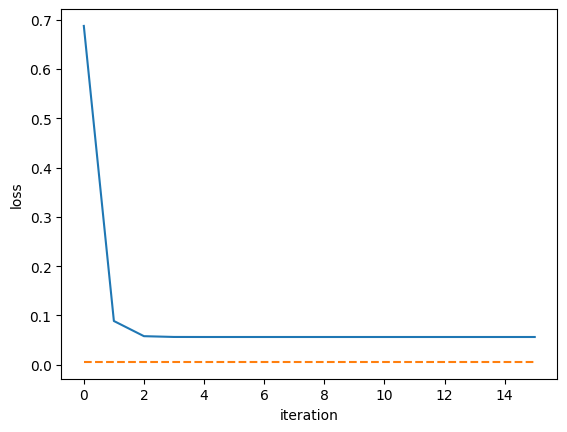

In [ ]:
plt.plot(loss_list)
plt.plot([i for i in range(len(loss_list))], [train_error_opt]*len(loss_list), '--')
plt.xlabel('iteration')
plt.ylabel('loss')

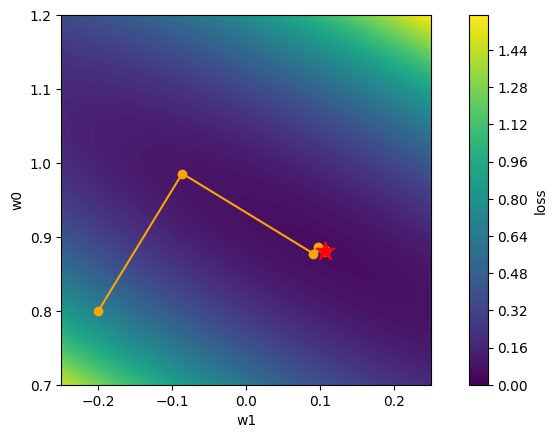

In [ ]:
w1s = np.linspace(-0.25,0.25,101)
w0s = np.linspace(0.7,1.2,51)
plot_optimization_trajectory(w_list, w1s, w0s, w_opt)

### Stochastic gradient descent

$w^{(t+1)} = w^{(t)} - \eta_t \sum_{i\in B_t}\frac{\partial L_{i}}{\partial w}|_{w=w^{(t)}}, \quad B_t \subset \{1, \ldots, N\}$,

where $L_i = \frac{1}{2}(\text{x}_i^\top w - y_i)^2$.

In [ ]:
def minibatch_gradient(x, y, w, batch_indices):
    p = len(w)-1
    X = getX(x, p)
    Xb = X[:, batch_indices]
    yb = y[batch_indices]
    return np.dot(Xb, np.dot(Xb.T, w)) - np.dot(Xb, yb)

#### setting 1

In [ ]:
p = 1
eta = 0.1
T = 500
batch_size = 1
w_init = np.zeros(p+1)
w_list = [w_init]
loss_list = [loss(x_train, y_train, w_init)]
for i in range(T):
    w_prev = w_list[-1]
    batch_indices = np.random.randint(N_train, size=batch_size)
    w_cur = w_prev - eta * minibatch_gradient(x_train, y_train, w_prev, batch_indices)
    w_list.append(w_cur)
    loss_list.append(loss(x_train, y_train, w_cur))

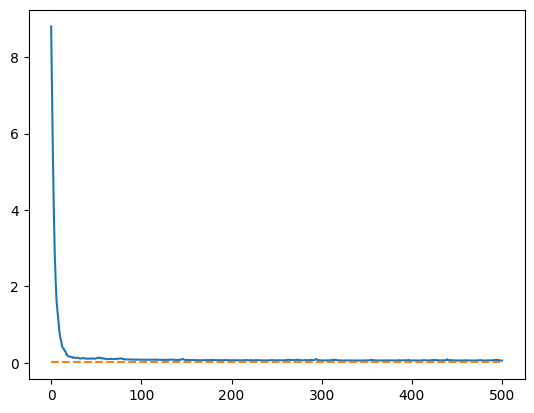

In [ ]:
plt.plot(loss_list)
plt.plot([i for i in range(len(loss_list))], [train_error_opt]*len(loss_list), '--')

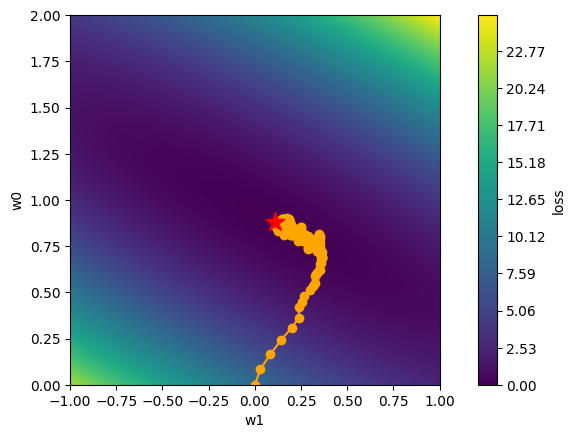

In [ ]:
w1s = np.linspace(-1,1,101)
w0s = np.linspace(0,2,51)
plot_optimization_trajectory(w_list, w1s, w0s, w_opt)

#### setting 2

In [ ]:
p = 1
eta = 0.1
T = 400
batch_size = 5
w_init = np.zeros(p+1)
w_list = [w_init]
loss_list = [loss(x_train, y_train, w_init)]
for i in range(T):
    w_prev = w_list[-1]
    batch_indices = np.random.randint(N_train, size=batch_size)
    w_cur = w_prev - eta * minibatch_gradient(x_train, y_train, w_prev, batch_indices)
    w_list.append(w_cur)
    loss_list.append(loss(x_train, y_train, w_cur))

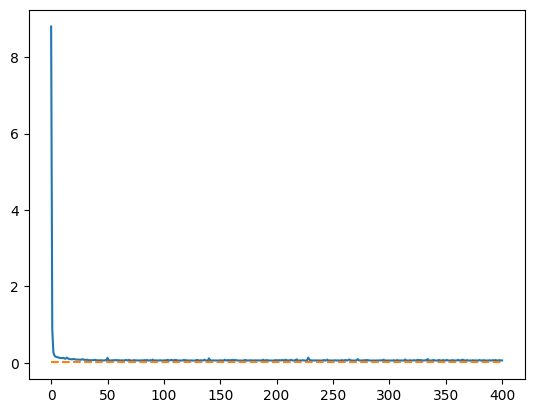

In [ ]:
plt.plot(loss_list)
plt.plot([i for i in range(len(loss_list))], [train_error_opt]*len(loss_list), '--')

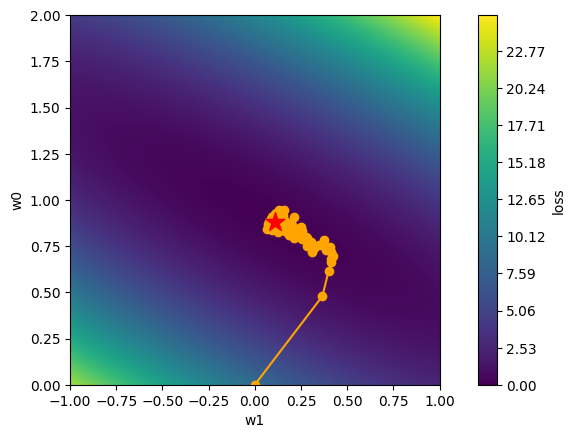

In [ ]:
w1s = np.linspace(-1,1,101)
w0s = np.linspace(0,2,51)
plot_optimization_trajectory(w_list, w1s, w0s, w_opt)

#### setting 3

In [ ]:
p = 1
eta = 0.1
T = 5000
batch_size = 1
w_init = np.zeros(p+1)
w_list = [w_init]
loss_list = [loss(x_train, y_train, w_init)]
for i in range(T):
    w_prev = w_list[-1]
    batch_indices = np.random.randint(N_train, size=batch_size)
    eta = 1./(5.+i)
    w_cur = w_prev - eta * minibatch_gradient(x_train, y_train, w_prev, batch_indices)
    w_list.append(w_cur)
    loss_list.append(loss(x_train, y_train, w_cur))

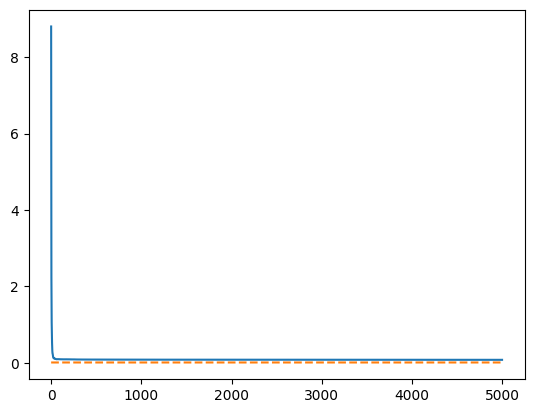

In [ ]:
plt.plot(loss_list)
plt.plot([i for i in range(len(loss_list))], [train_error_opt]*len(loss_list), '--')

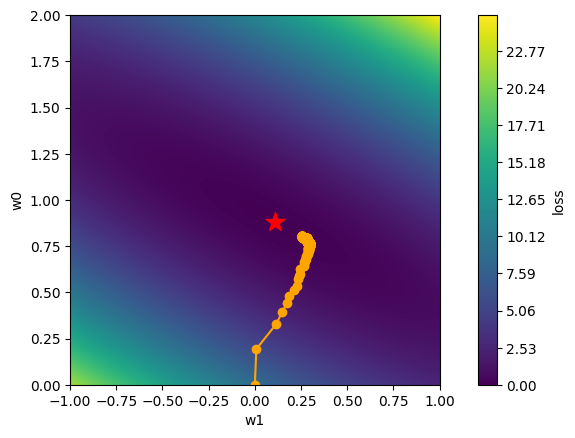

In [ ]:
w1s = np.linspace(-1,1,101)
w0s = np.linspace(0,2,51)
plot_optimization_trajectory(w_list, w1s, w0s, w_opt)